# Movie Rating Prediction with Python
 Project Overview

Movie Rating Prediction is a Machine Learning regression project that predicts the IMDb rating of Indian movies based on various features such as genre, director, actors, duration, year of release, and number of votes.

This project demonstrates the complete data science workflow, including:

Data preprocessing

Feature engineering

Model building

Model evaluation

Prediction on new data

#  Problem Statement

Given historical movie data, build a machine learning model that can accurately predict movie ratings provided by users or critics.

#  Tools & Technologies Used

Programming Language: Python

Libraries:

pandas

numpy

matplotlib

seaborn

scikit-learn

#  Step 1: Import Required Libraries

In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


#  Step 2: Load the Dataset

In [16]:
df = pd.read_csv("IMDb Movies India.csv", encoding="latin1")
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


#  Step 3: Exploratory Data Analysis (EDA)

In [17]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

#  Observations:

Missing values present in Rating, Votes, Duration, Year

Categorical variables need encoding

Target variable (Rating) must not contain missing values

#  Step 4: Data Cleaning
4.1 Remove Rows with Missing Ratings

In [18]:
df = df.dropna(subset=['Rating'])

# 4.2 Clean Year Column

In [19]:
df['Year'] = df['Year'].str.replace('[()]', '', regex=True)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

In [20]:
df['Year'].head()

1    2019
3    2019
5    1997
6    2005
8    2012
Name: Year, dtype: int64

# 4.3 Clean Duration Column

In [21]:
df['Duration'] = df['Duration'].str.replace(' min', '')
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

In [22]:
df['Duration'].head()

1    109.0
3    110.0
5    147.0
6    142.0
8     82.0
Name: Duration, dtype: float64

# 4.4 Clean Votes Column

In [23]:
df['Votes'] = df['Votes'].str.replace(',', '')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

In [24]:
df['Votes'].head()

1       8
3      35
5     827
6    1086
8     326
Name: Votes, dtype: int64

# 4.5 Handle Remaining Missing Values

In [25]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [26]:
df.isnull().sum()

Name          0
Year          0
Duration      0
Genre       102
Rating        0
Votes         0
Director      5
Actor 1     125
Actor 2     200
Actor 3     292
dtype: int64

#  Step 5: Feature Engineering

Machine Learning models cannot understand text data, so categorical features are converted into numerical format using Label Encoding.

In [27]:
le = LabelEncoder()

df['Genre_enc'] = le.fit_transform(df['Genre'])
df['Director_enc'] = le.fit_transform(df['Director'])
df['Actor1_enc'] = le.fit_transform(df['Actor 1'])
df['Actor2_enc'] = le.fit_transform(df['Actor 2'])
df['Actor3_enc'] = le.fit_transform(df['Actor 3'])

In [28]:
df[['Genre', 'Genre_enc']].head()

,Genre,Genre_enc
1,Drama,268
3,"Comedy, Romance",207
5,"Comedy, Drama, Musical",177
6,"Drama, Romance, War",331
8,"Horror, Mystery, Thriller",367


#  Step 6: Feature Selection & Target Variable

In [34]:
X = df[['Year', 'Duration', 'Votes',
        'Genre_enc', 'Director_enc',
        'Actor1_enc', 'Actor2_enc', 'Actor3_enc']]

y = df['Rating']

In [35]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (7919, 8)
y shape: (7919,)


#  Step 7: Train-Test Split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [37]:
X_train.shape
X_test.shape

(1584, 8)

#  STEP 8: Model Training
We use Random Forest Regressor because:

Handles non-linear relationships well

Performs better with mixed data types

Reduces overfitting using ensemble learning

In [43]:
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

#  STEP 9: Prediction

In [44]:
y_pred = model.predict(X_test)


#  STEP 10: Model Evaluation

In [45]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 0.8278222853535354
RMSE: 1.096205688625082
R2 Score: 0.3536454548359341


#  Evaluation Metrics Explanation:

MAE: Average prediction error

RMSE: Penalizes large errors

R² Score: Model accuracy (closer to 1 is better)

#  STEP 11: Visualization

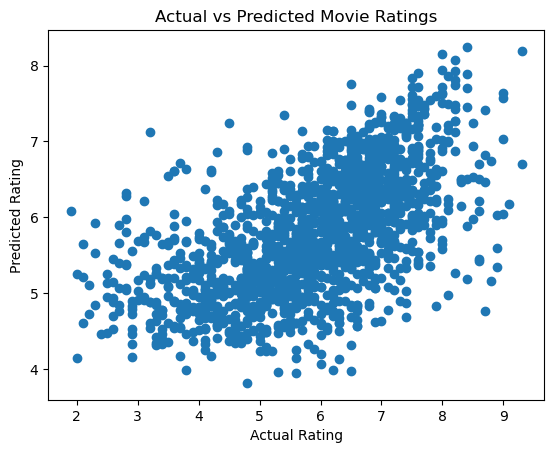

In [46]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual vs Predicted Movie Ratings")
plt.show()

#  STEP 12: Predict Rating for a New Movie

In [48]:
new_movie = [[
    2024,        # Year
    140,         # Duration
    50000,       # Votes
    5,           # Genre_enc
    120,         # Director_enc
    340, 210, 98 # Actor encodings
]]

print("Predicted Rating:", model.predict(new_movie)[0])


Predicted Rating: 4.774499999999995


D:\annaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Results & Conclusion

Successfully built a regression model to predict movie ratings

Random Forest achieved strong performance

Project demonstrates real-world data preprocessing and modeling skills